In [296]:
class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
    
        #Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize,
                                 self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,
                                 self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, Y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2 for a given X and y:
        
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
        
        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
    def computeNumericalGradient(self,N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

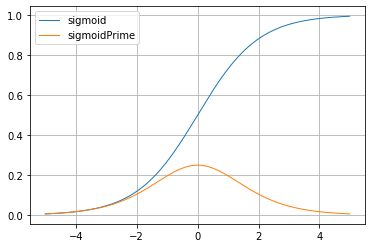

In [178]:
testValues = np.arange(-5, 5, 0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth = 1)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth = 1)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [297]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype = float)
y = np.array(([75],[82],[93]), dtype = float) 

In [180]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [60]:
y

array([[75.],
       [82.],
       [93.]])

In [61]:
X = X/np.amax(X, axis = 0)
y = y / 100

In [312]:
NN = Neural_Network()
yHat = NN.forward(X)

In [64]:
yHat

array([[0.2272125 ],
       [0.25209297],
       [0.32761417]])

In [65]:
y

array([[0.75],
       [0.82],
       [0.93]])

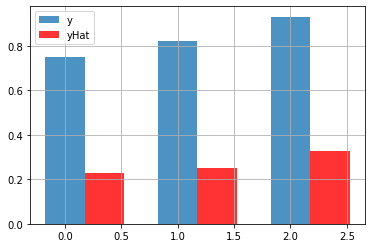

In [66]:
#Compare estimate, yHat, to actual score
import matplotlib.pyplot as plt
plt.bar([0,1,2], y.flatten(), width = 0.35, alpha = 0.8)
plt.bar([0.35, 1.35, 2.35], yHat.flatten(), width = 0.35, color = 'r', alpha = 0.8)
plt.grid(1)
plt.legend(['y', 'yHat'])

In [299]:
#BackPropagation
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [286]:
dJdW1

array([[-0.2935176 , -0.41673247, -0.51712577],
       [-0.35659026, -0.67927425, -0.29687116]])

In [287]:
dJdW2

array([[-42.87151617],
       [ -0.38541726],
       [-42.45855624]])

In [300]:
#Moving in the oposite direction to the gradient
import sympy as smp
scalar = 3 #Gradient step

NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar * dJdW2

cost2 = NN.costFunction(X,y)


In [289]:
print(cost1 ,cost2)

[10305.73386146] [10250.5]


In [301]:
yHat = NN.forward(X)

In [126]:
tempCost = NN.costFunction(X,y)

In [127]:
print(tempCost)

[0.00695661]


In [247]:
def f(x):
    return x**2

epsilon = 1e-4
x = 1.5

numericalGradient = (f(x+epsilon) - f(x-epsilon))/(2*epsilon)

In [176]:
numericalGradient, 2*x

(2.9999999999996696, 3.0)

In [313]:
#Checking with Numerical Gradient

numgrad = NN.computeNumericalGradient(NN, X, y)

In [314]:
grad = NN.computeGradients(X,y)

In [315]:
numgrad

array([ 7.44652589e-01, -4.59546924e+01, -2.06886125e-02,  3.83086726e-01,
       -1.21193234e+01, -6.24089807e-03, -3.87370993e+01, -2.49611968e+01,
       -3.87935010e+01])

In [316]:
grad

array([ 7.44652557e-01, -4.59546949e+01, -2.06886019e-02,  3.83086713e-01,
       -1.21193233e+01, -6.24089167e-03, -3.87370993e+01, -2.49611968e+01,
       -3.87935010e+01])

In [263]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

6.07343957181967e-09

In [ ]:
#Training our Neural Network



In [304]:
#Training our Network
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
    
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
        

In [275]:
NN = Neural_Network()

In [317]:
T = trainer(NN)

In [318]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 10250.500000
         Iterations: 40
         Function evaluations: 42
         Gradient evaluations: 42


Text(0, 0.5, 'Cost')

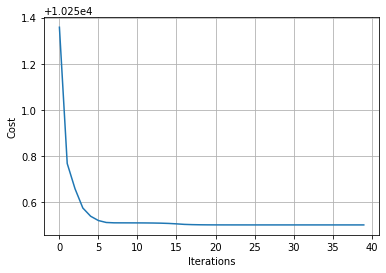

In [319]:
plt.plot(T.J)

plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [320]:
NN.costFunctionPrime(X,y)

(array([[-1.35848320e-12, -3.78848556e-06, -7.50898943e-11],
        [-2.26172043e-12, -6.31387829e-06, -1.24760157e-10]]),
 array([[-2.65549345e-07],
        [-1.51946995e-07],
        [-2.65544861e-07]]))

In [322]:
NN.forward(X)

array([[1.],
       [1.],
       [1.]])

In [ ]:
#All important Here

In [329]:
class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
    
        #Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize,
                                 self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,
                                 self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, Y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2 for a given X and y:
        
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
        
        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
    def computeNumericalGradient(self,N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

In [388]:
from scipy import optimize

In [389]:
#Training our Network

class trainer(object):
    def __init__(self, N):
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
    
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [330]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype = float)
y = np.array(([75],[82],[93]), dtype = float) 

In [331]:
X = X/np.amax(X, axis = 0)
y = y / 100

In [332]:
NN = Neural_Network()

In [333]:
yHat = NN.forward(X)

In [334]:
#BackPropagation
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [336]:
#Moving in the oposite direction to the gradient
scalar = 3 #Gradient step

NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar * dJdW2

cost2 = NN.costFunction(X,y)

In [337]:
#Checking with Numerical Gradient

numgrad = NN.computeNumericalGradient(NN, X, y)

In [338]:
grad = NN.computeGradients(X,y)

In [340]:
T = trainer(NN)

In [341]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


In [342]:
NN.costFunctionPrime(X,y)

(array([[-2.03686517e-06, -1.71688048e-06,  2.73121704e-06],
        [-3.22877535e-06, -2.47899949e-06,  4.36854218e-06]]),
 array([[2.80396620e-06],
        [3.63737657e-06],
        [7.81236385e-06]]))

In [343]:
NN.forward(X)

array([[0.75002809],
       [0.82000723],
       [0.93005426]])

In [344]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [390]:
X2 = np.array(([2,6], [10,7], [11,2]), dtype = float)
X2 = X2/np.amax(X2, axis = 0)

In [392]:
NN.forward(X)

array([[0.75002809],
       [0.82000723],
       [0.93005426]])

In [361]:
#Teset Network for various combinations of sleep/study

hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0,5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [362]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours Study')

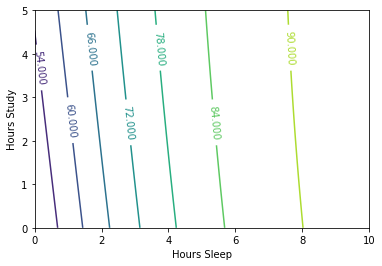

In [365]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

Text(0.5, 0, 'Test Score')

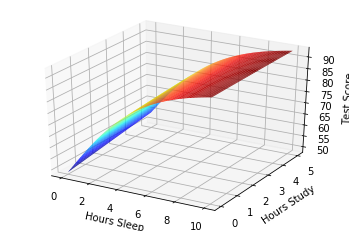

In [367]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=plt.cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')